# <b>Correlations, Linear Regressions, and Overall Analysis of the Hotel Data</b>

Authors: John Christenson

This notebook will analyze the hotel data in order to determine if there are any correlations between the variables. We will also share data visualizations and perform linear regressions on the data to determine if there are any significant relationships between the variables. Finally, we will provide an overall analysis of the data and provide recommendations for the hotel chain. 

Perpetual aims to place bins near all hotels with 90 or more rooms. To achieve this, we used Tripadvisor to find hotel locations, general information, and specific room counts. We employed two methods: one using the Tripadvisor API with geo-location and the other by web crawling the Tripadvisor website to pull all hotels in each city. Both methods gather basic hotel information via API calls and use web crawling for room counts.

For data analysis in each city we organized the data in two separate manners.  We merged hotel and business data using partial ratio fuzzy matching on names and addresses of correlations and OLS. Separately, we concatenated the data for data visualizations.

In [1]:
import pandas as pd
import utils.tripadvisor as tcd

# Hilo

The API Dataframe has 5 rows
The Crawled Dataframe has 16 rows


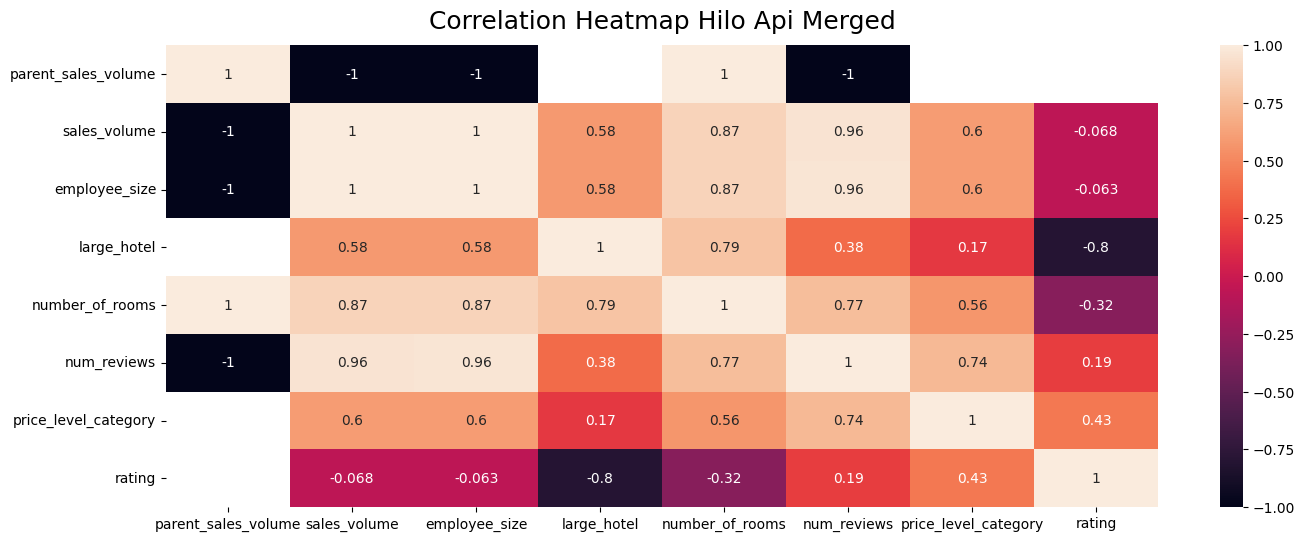

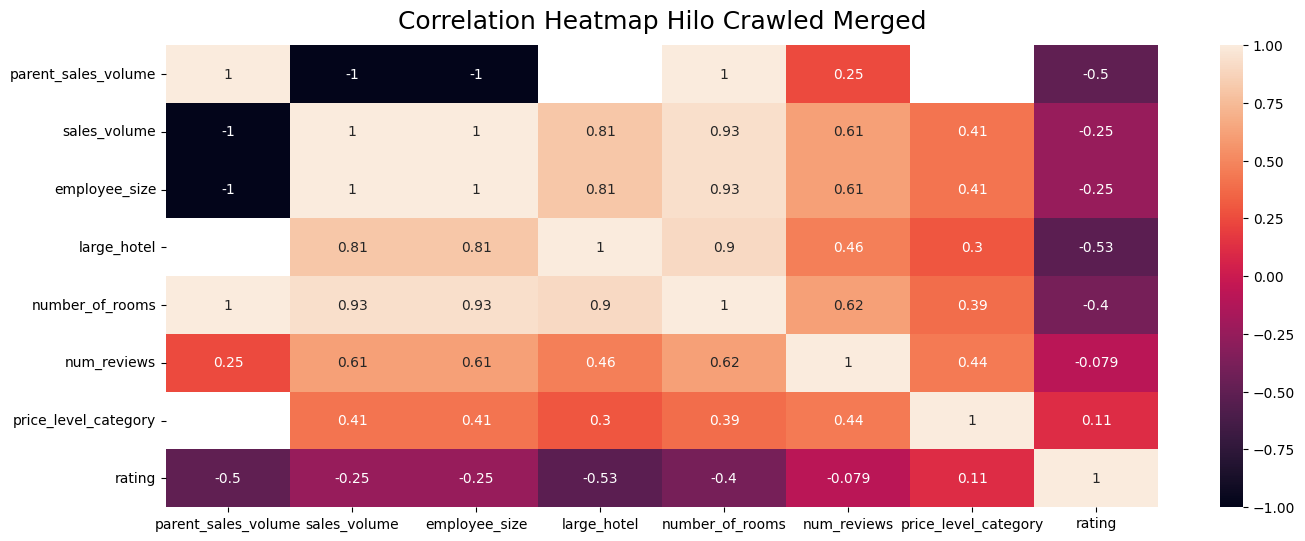

In [2]:
all_cities_df_dict = {}
hilo_df_dict = tcd.get_city_data("Hilo", "HI")
tcd.get_heatmaps("Hilo", hilo_df_dict)
api_merged_dict = hilo_df_dict["api_merged"]
crawled_merged_dict = hilo_df_dict["crawled_merged"]

Both heatmaps have noticeably high correlations between the Infogroup business data and the number of hotel rooms and number of reviews.  These two variables consistently outperformed the other variables, though as we see in linear regression for following cities, they remove some noise.

We did not run a linear regression for Hilo as there was not enough data (standard errors were infinite and the p-values were null.

The API hotel data has 7 hotels.


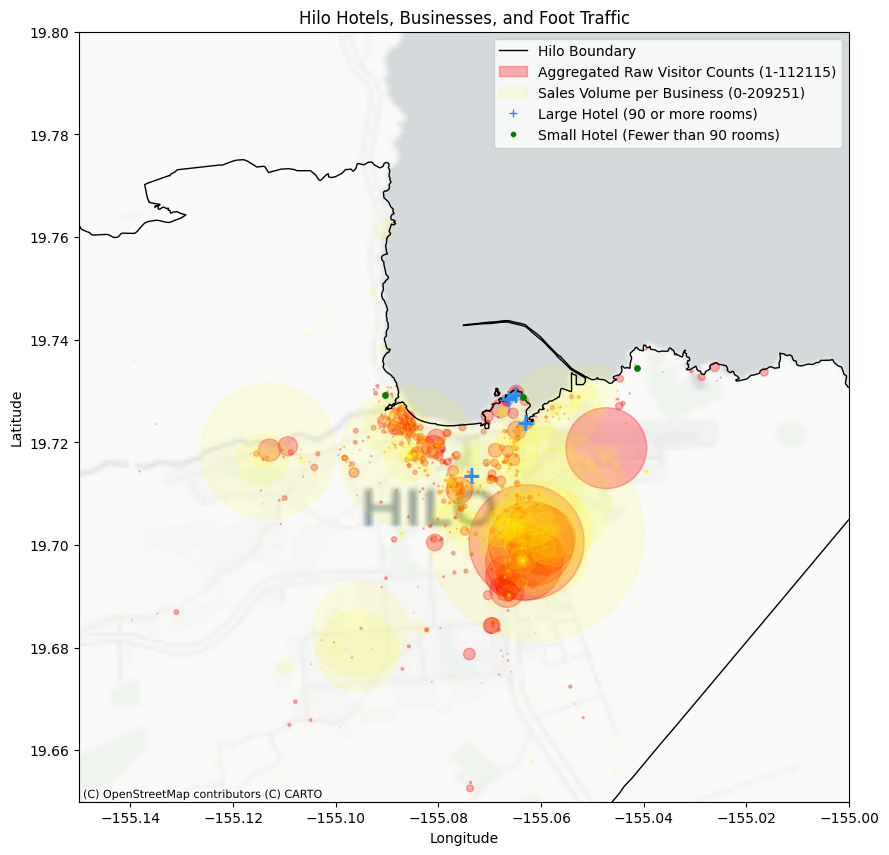

The Crawled hotel data has 36 hotels.


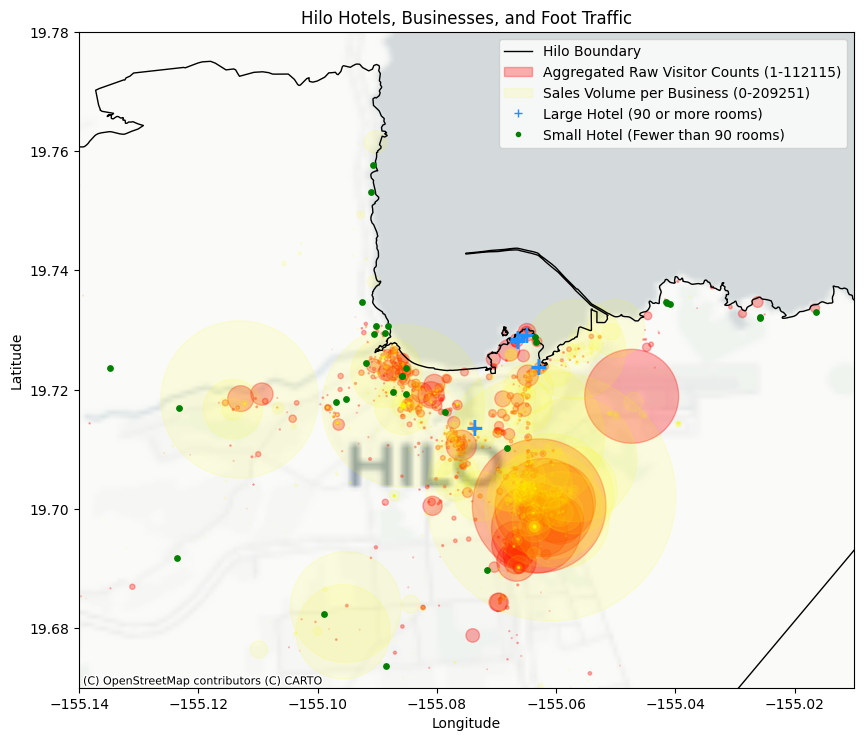

In [3]:
print(f"The API hotel data has {hilo_df_dict['api_hotels'].shape[0]} hotels.")
tcd.plot_hotel_business_visitor(
    "Hilo",
    hilo_df_dict["geo"],
    hilo_df_dict["api_concat"],
    -155.15,
    -155.00,
    19.65,
    19.80,
)
print(f"The Crawled hotel data has {hilo_df_dict['crawled_hotels'].shape[0]} hotels.")
tcd.plot_hotel_business_visitor(
    "Hilo",
    hilo_df_dict["geo"],
    hilo_df_dict["crawled_concat"],
    -155.14,
    -155.01,
    19.67,
    19.78,
)

In Hilo, the hotels identified via the API were all concentrated by the ocean, as shown in the zoomed-in view. However, the web crawl of Tripadvisor revealed many smaller lodgings scattered throughout Hilo.  When we looked into these hotels found only the the crawl dataframe, we found that many were small [B&Bs](https://www.tripadvisor.com/Hotel_Review-g60583-d290607-Reviews-Maureen_s_Bed_Breakfast-Hilo_Island_of_Hawaii_Hawaii.html), [inns](https://www.tripadvisor.com/Hotel_Review-g60583-d10759330-Reviews-Kaumana_Caves_Inn-Hilo_Island_of_Hawaii_Hawaii.html), and one poorly rated [condo](https://www.tripadvisor.com/Hotel_Review-g60583-d26728945-Reviews-Castle_Hilo_Hawaiian_Hotel-Hilo_Island_of_Hawaii_Hawaii.html) with few reviews.

Additionally we discovered that the ***Tripadvisor API, as labeled throughtout this notebook, only pulls locations whose subcategory is also hotel***.  This means inns, condos, B&Bs, and other types of lodgings are not included in the API data.  This is why we have a discrepancy between the API and the web crawl data.

# Ann Arbor

The API Dataframe has 28 rows
The Crawled Dataframe has 40 rows


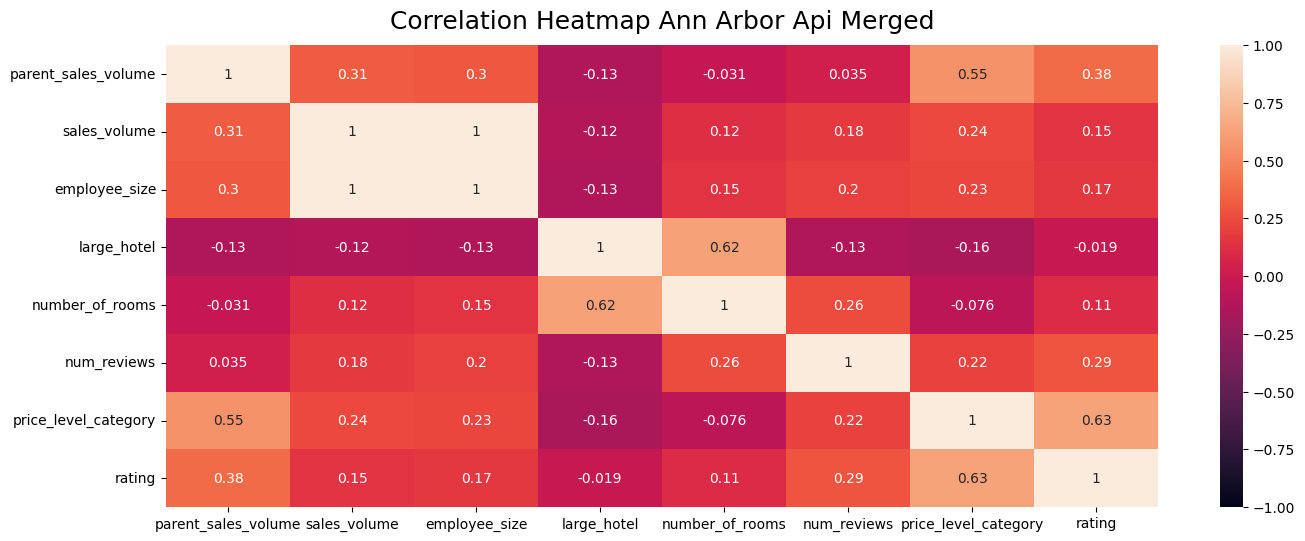

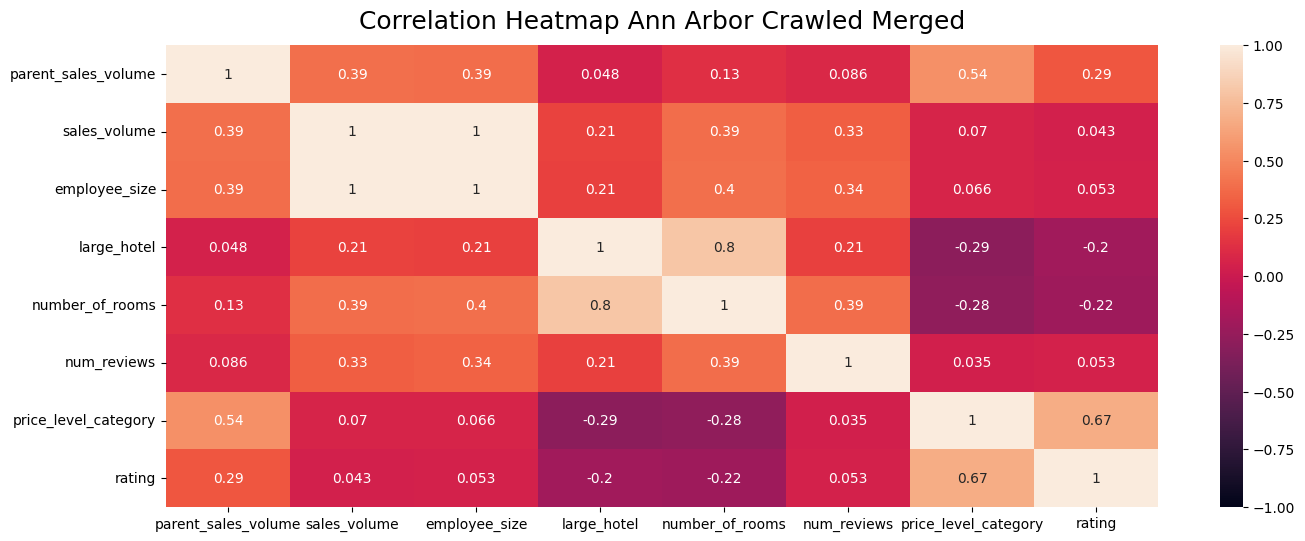

In [4]:
ann_arbor_df_dict = tcd.get_city_data("Ann Arbor", "MI")
tcd.get_heatmaps("Ann Arbor", ann_arbor_df_dict)
api_merged_dict = ann_arbor_df_dict["api_merged"]
crawled_merged_dict = ann_arbor_df_dict["crawled_merged"]

As we see in the Ann Arbor heatmap, there is no correlation between any of independent hotel variables and business data showing the lack in consistency between cities.

In [5]:
tcd.get_city_linear_regression("Ann Arbor", ann_arbor_df_dict["api_merged"], "api")

####################################################################################################
Ann Arbor Api: Parent Sales Volume
####################################################################################################
####################################################################################################
y: 2    20773000.0
Name: parent_sales_volume, dtype: float64
X:    number_of_rooms  num_reviews  price_level_category  rating
2            110.0          878                     3     5.0
                             OLS Regression Results                            
Dep. Variable:     parent_sales_volume   R-squared:                       0.313
Model:                             OLS   Adj. R-squared:                  0.141
Method:                  Least Squares   F-statistic:                     1.824
Date:                 Tue, 21 May 2024   Prob (F-statistic):              0.174
Time:                         18:32:44   Log-Likelihood:                -3

With the addition of additional independent variables via OLS regression number of rooms consitently has the highest p-value in the linear regressions, showing that when other independent variables are included, the number of rooms is the most significant indicator of business.

The API hotel data has 30 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


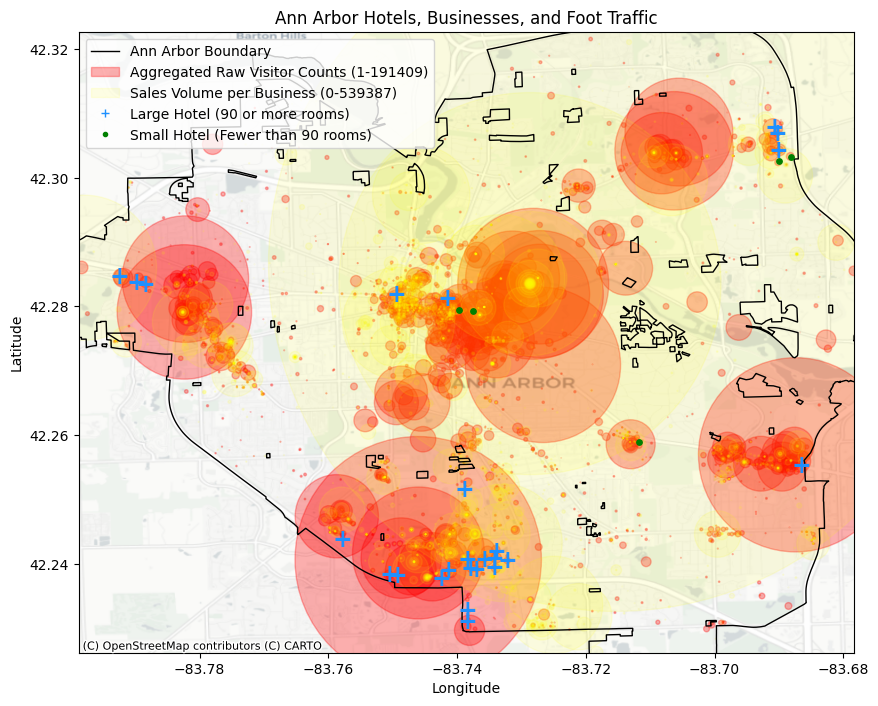

The Crawled hotel data has 56 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


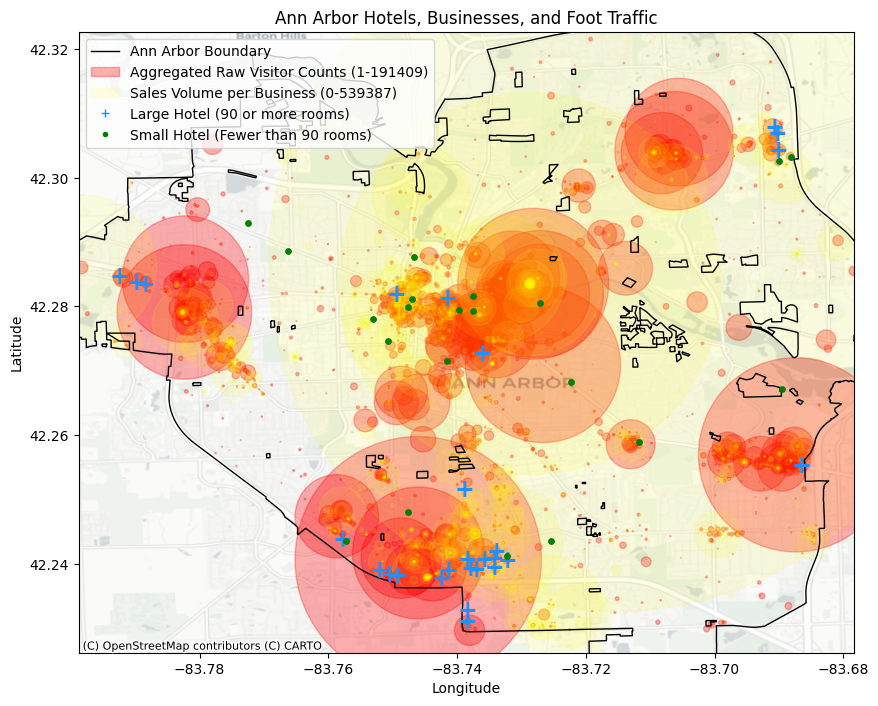

In [6]:
print(f"The API hotel data has {ann_arbor_df_dict['api_hotels'].shape[0]} hotels.")
tcd.plot_hotel_business_visitor(
    "Ann Arbor", ann_arbor_df_dict["geo"], ann_arbor_df_dict["api_concat"]
)
print(
    f"The Crawled hotel data has {ann_arbor_df_dict['crawled_hotels'].shape[0]} hotels."
)
tcd.plot_hotel_business_visitor(
    "Ann Arbor", ann_arbor_df_dict["geo"], ann_arbor_df_dict["crawled_concat"]
)

# Galveston

The API Dataframe has 44 rows
The Crawled Dataframe has 64 rows


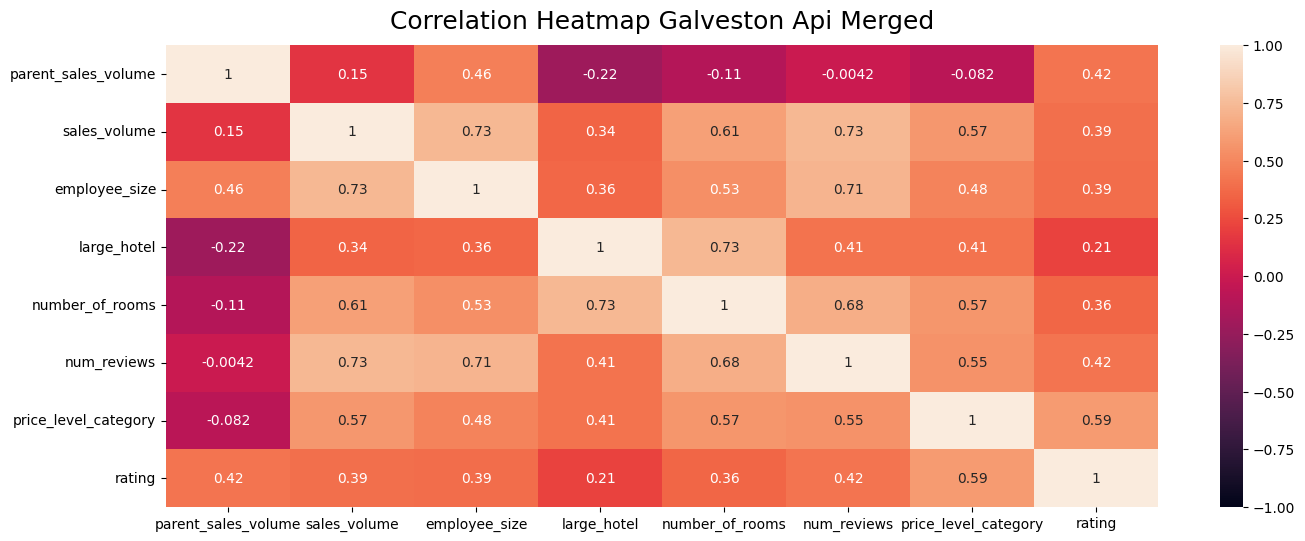

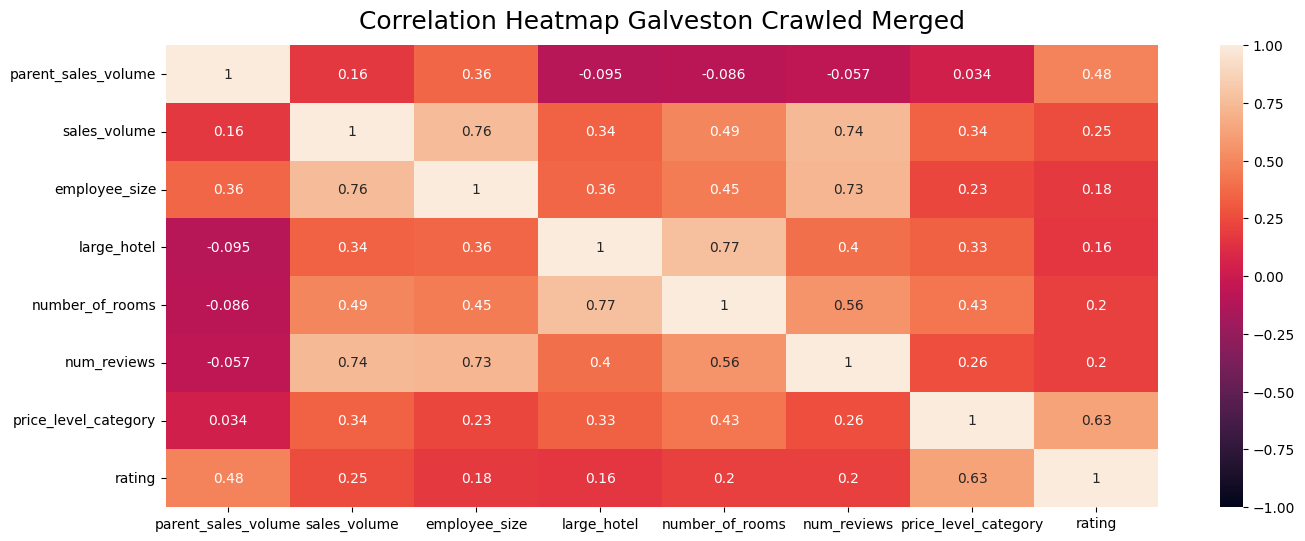

In [7]:
galveston_df_dict = tcd.get_city_data("Galveston", "TX")
tcd.get_heatmaps("Galveston", galveston_df_dict)
api_merged_dict = galveston_df_dict["api_merged"]
crawled_merged_dict = galveston_df_dict["crawled_merged"]

Number of reviews stands out as the most correlated variable with business variables in Galveston.

In [8]:
tcd.get_city_linear_regression("Galveston", galveston_df_dict["api_merged"], "api")

####################################################################################################
Galveston Api: Parent Sales Volume
####################################################################################################
####################################################################################################
y: 0    481000.0
Name: parent_sales_volume, dtype: float64
X:    number_of_rooms  num_reviews  price_level_category  rating
0            122.0          694                   2.0     4.0
                             OLS Regression Results                            
Dep. Variable:     parent_sales_volume   R-squared:                       0.239
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     1.413
Date:                 Tue, 21 May 2024   Prob (F-statistic):              0.270
Time:                         18:35:43   Log-Likelihood:                -391

For local business variables, the number of Tripadvisor reviews holds the lowest p-value in the linear regression.  This is consistent with the heatmap, which shows the highest correlation between the number of reviews and the number of rooms.

The API hotel data has 62 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


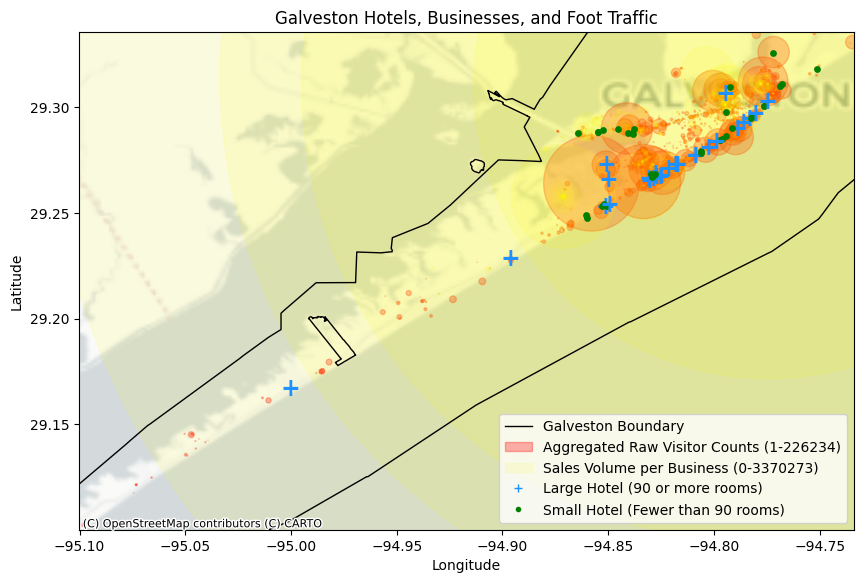

The Crawled hotel data has 113 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


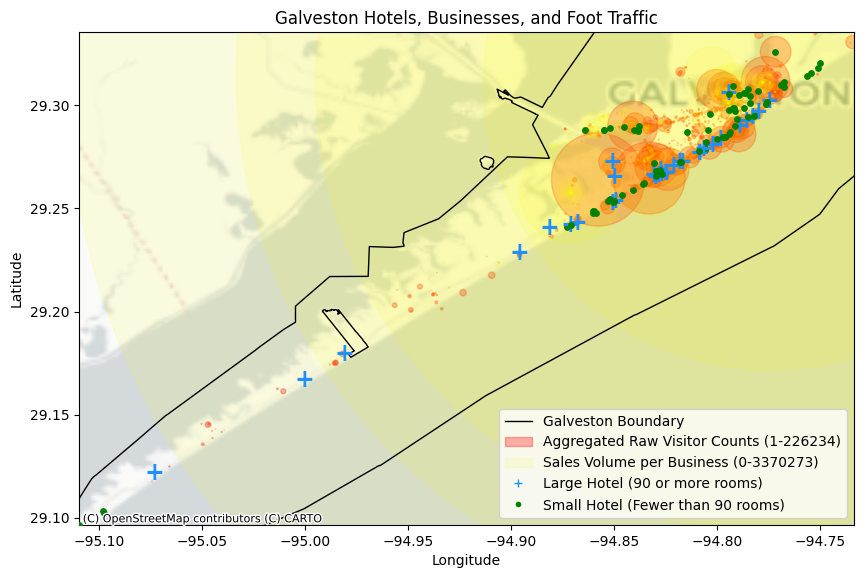

In [9]:
print(f"The API hotel data has {galveston_df_dict['api_hotels'].shape[0]} hotels.")
tcd.plot_hotel_business_visitor(
    "Galveston", galveston_df_dict["geo"], galveston_df_dict["api_concat"]
)
print(
    f"The Crawled hotel data has {galveston_df_dict['crawled_hotels'].shape[0]} hotels."
)
tcd.plot_hotel_business_visitor(
    "Galveston", galveston_df_dict["geo"], galveston_df_dict["crawled_concat"]
)

# Jersey City

The API Dataframe has 13 rows
The Crawled Dataframe has 23 rows


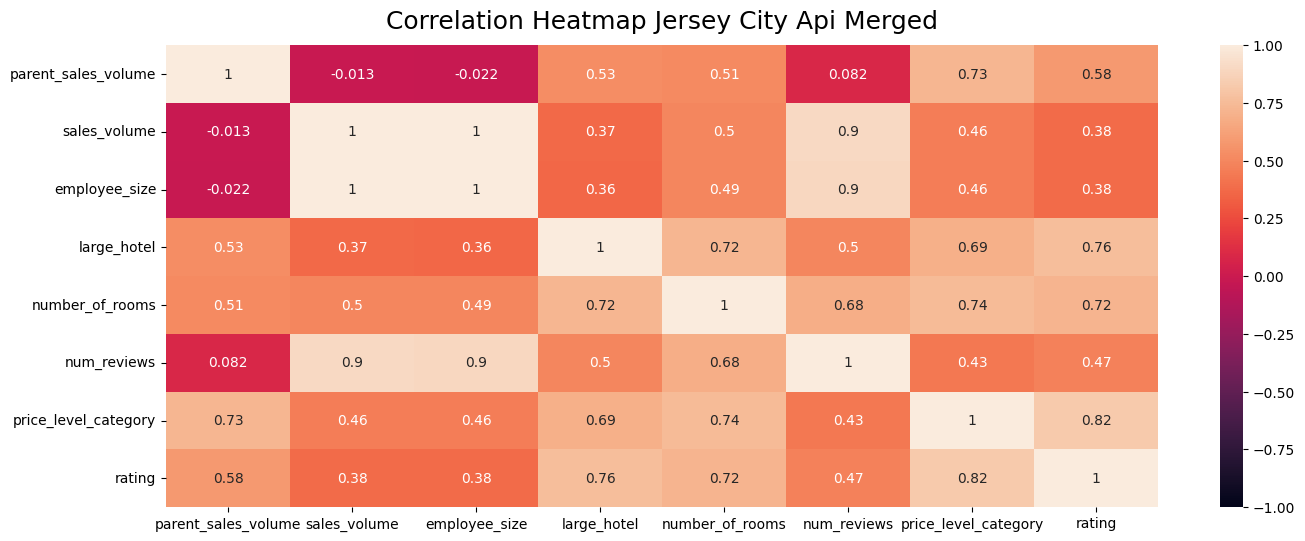

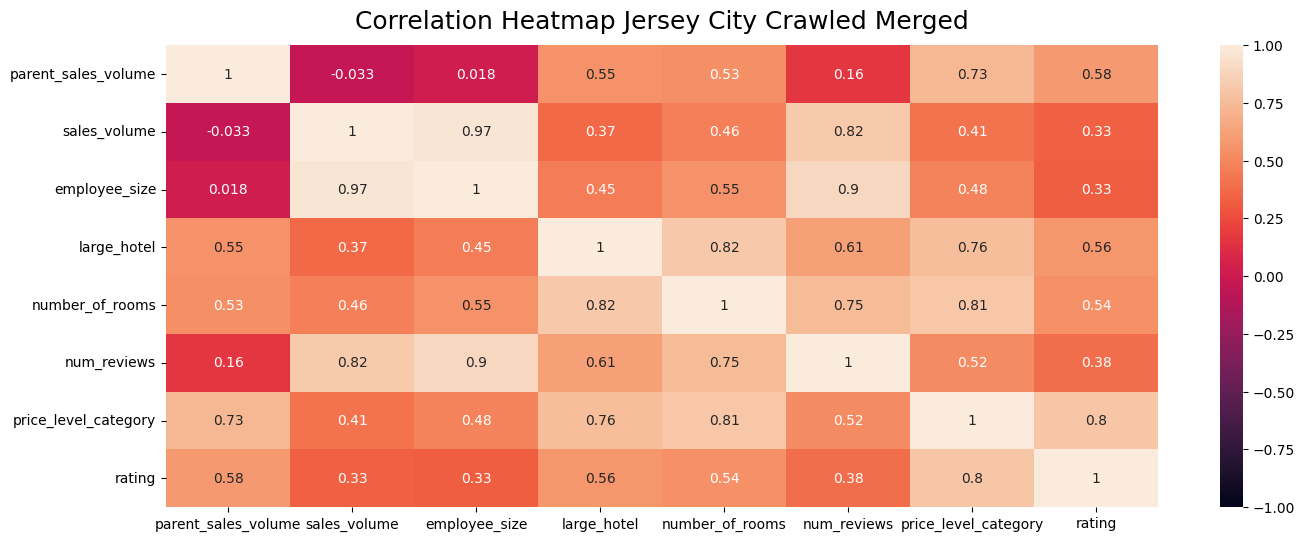

In [10]:
jersey_city_df_dict = tcd.get_city_data("Jersey City", "NJ")
tcd.get_heatmaps("Jersey City", jersey_city_df_dict)
api_merged_dict = jersey_city_df_dict["api_merged"]
crawled_merged_dict = jersey_city_df_dict["crawled_merged"]

In Jersey City the number of reviews is highly correlated with the business data columns sales volume and number of employees.

In [11]:
tcd.get_city_linear_regression("Jersey City", jersey_city_df_dict["api_merged"], "api")

####################################################################################################
Jersey City Api: Parent Sales Volume
####################################################################################################
####################################################################################################
y: 1    20773000.0
Name: parent_sales_volume, dtype: float64
X:    number_of_rooms  num_reviews  price_level_category  rating
1            152.0          291                   3.0     4.5
                             OLS Regression Results                            
Dep. Variable:     parent_sales_volume   R-squared:                       0.592
Model:                             OLS   Adj. R-squared:                  0.320
Method:                  Least Squares   F-statistic:                     2.175
Date:                 Tue, 21 May 2024   Prob (F-statistic):              0.189
Time:                         18:38:07   Log-Likelihood:                

In the linear regression; however the number of rooms, number of reviews, and price level are consistently significant variables at the local business level.

The API hotel data has 19 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


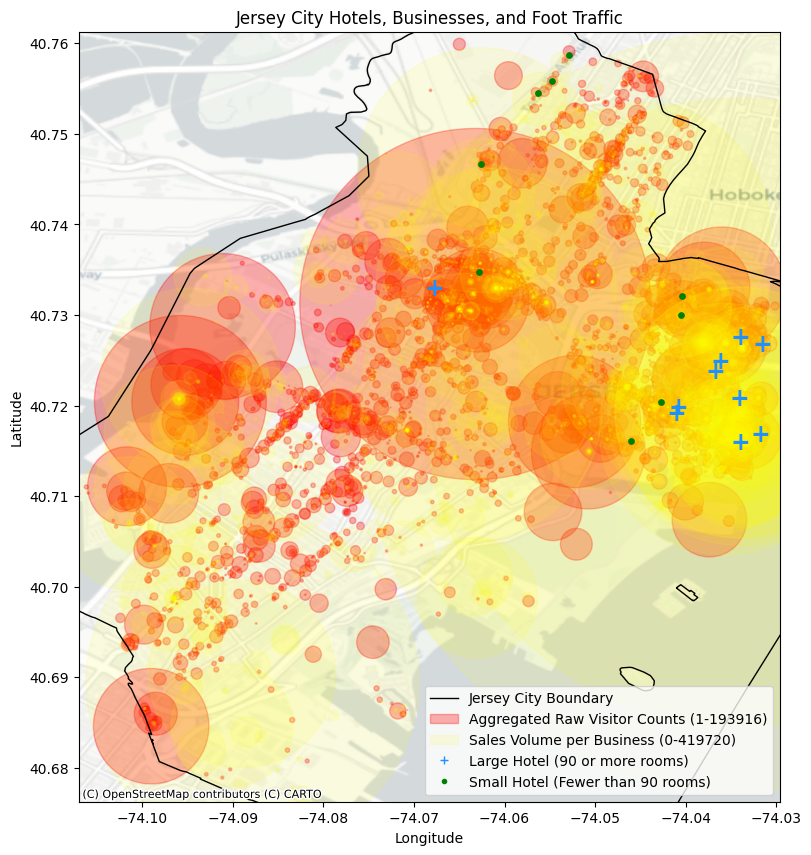

The Crawled hotel data has 112 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


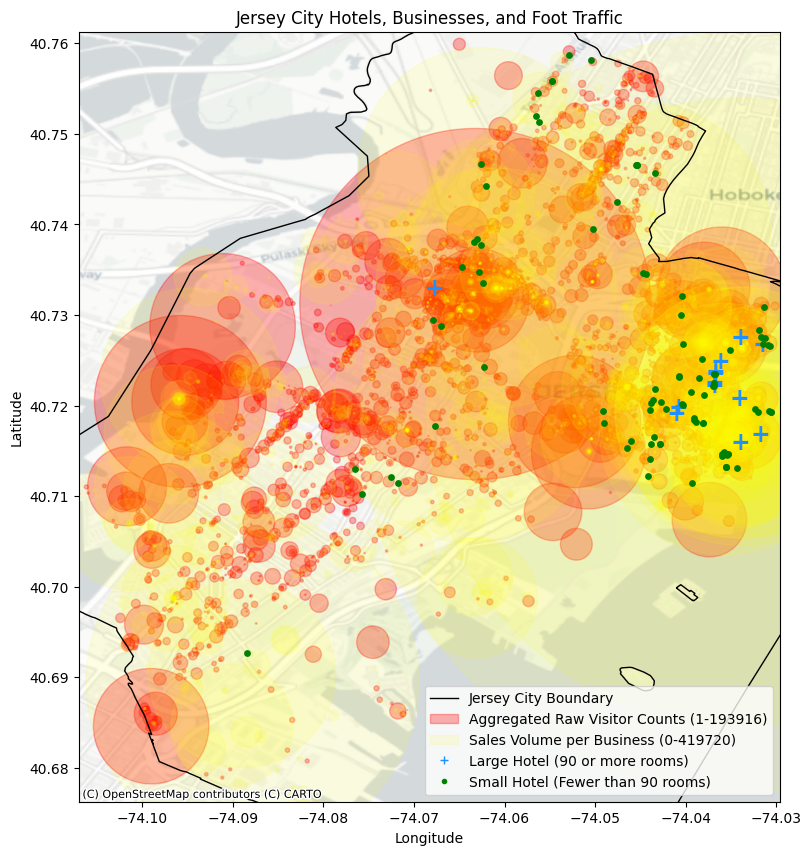

In [12]:
print(f"The API hotel data has {jersey_city_df_dict['api_hotels'].shape[0]} hotels.")
tcd.plot_hotel_business_visitor(
    "Jersey City", jersey_city_df_dict["geo"], jersey_city_df_dict["api_concat"]
)
print(
    f"The Crawled hotel data has {jersey_city_df_dict['crawled_hotels'].shape[0]} hotels."
)
tcd.plot_hotel_business_visitor(
    "Jersey City", jersey_city_df_dict["geo"], jersey_city_df_dict["crawled_concat"]
)

We see the hotels, via the API clustered around two spots that allow highly overlap with visitor or business concentrations. 

# Sunnyvale

The API Dataframe has 35 rows
The Crawled Dataframe has 38 rows


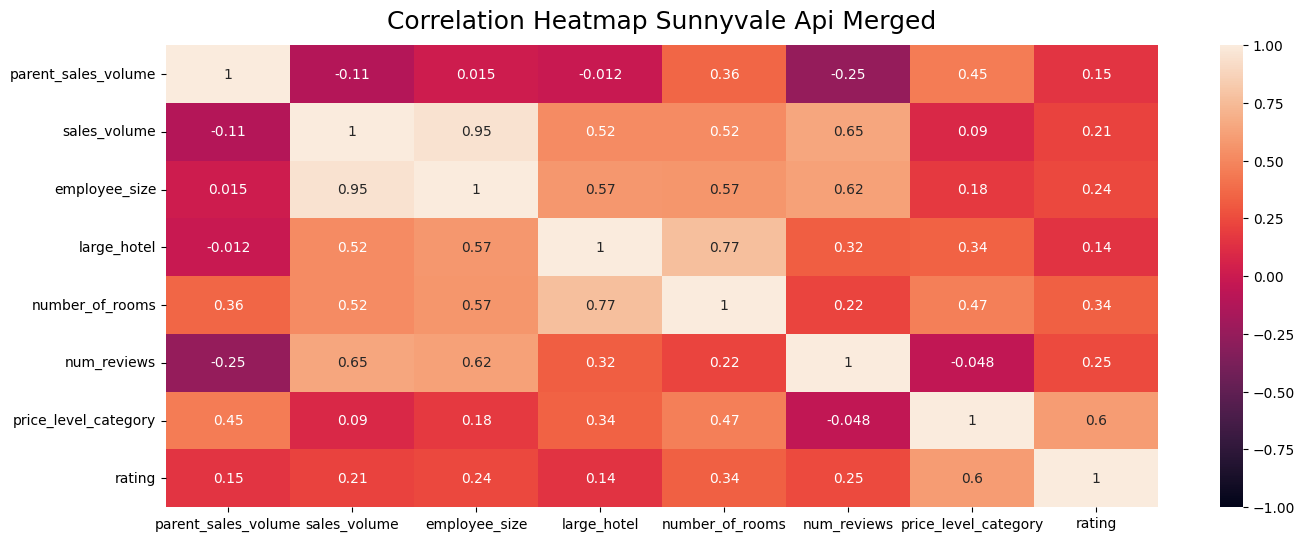

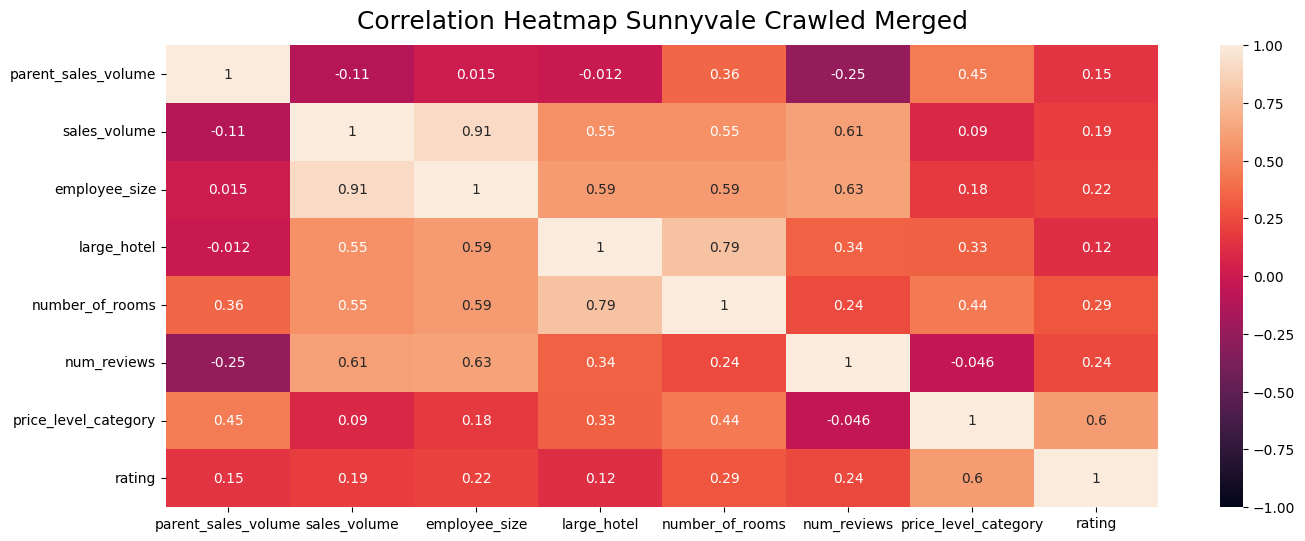

In [13]:
sunnyvale_df_dict = tcd.get_city_data("Sunnyvale", "CA")
tcd.get_heatmaps("Sunnyvale", sunnyvale_df_dict)
api_merged_dict = sunnyvale_df_dict["api_merged"]
crawled_merged_dict = sunnyvale_df_dict["crawled_merged"]

For Sunnyvale, the number of reviews and number of rooms and size of the hotel are all somewhat correlated with the business data.

In [14]:
tcd.get_city_linear_regression("Sunnyvale", sunnyvale_df_dict["api_merged"], "api")

####################################################################################################
Sunnyvale Api: Parent Sales Volume
####################################################################################################
####################################################################################################
y: 0    20773000.0
Name: parent_sales_volume, dtype: float64
X:    number_of_rooms  num_reviews  price_level_category  rating
0            247.0          205                   1.0     4.0
                             OLS Regression Results                            
Dep. Variable:     parent_sales_volume   R-squared:                       0.370
Model:                             OLS   Adj. R-squared:                  0.177
Method:                  Least Squares   F-statistic:                     1.912
Date:                 Tue, 21 May 2024   Prob (F-statistic):              0.168
Time:                         18:41:07   Log-Likelihood:                -3

At the local business level, the number of rooms is the only statisitically significant variable in the linear regression.

The API hotel data has 39 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


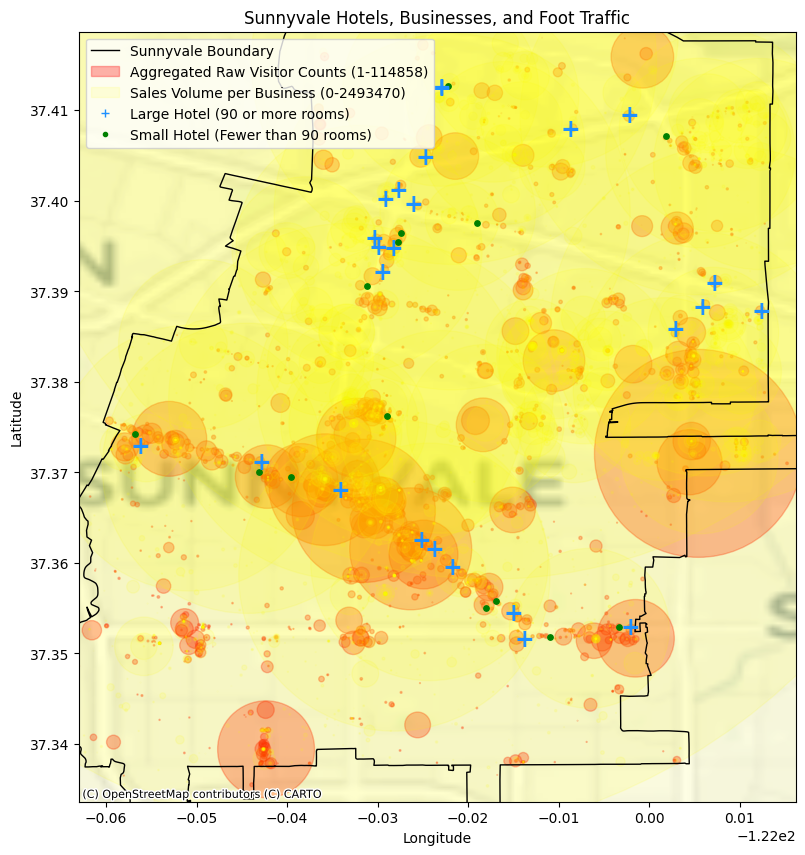

The Crawled hotel data has 48 hotels.


/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


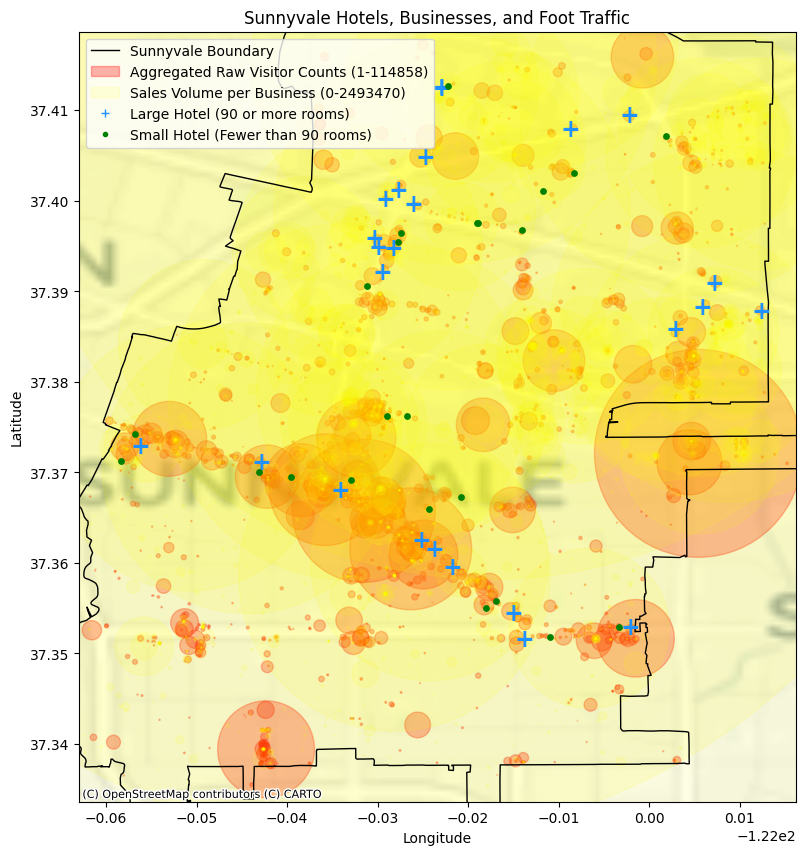

In [15]:
print(f"The API hotel data has {sunnyvale_df_dict['api_hotels'].shape[0]} hotels.")
tcd.plot_hotel_business_visitor(
    "Sunnyvale", sunnyvale_df_dict["geo"], sunnyvale_df_dict["api_concat"]
)
print(
    f"The Crawled hotel data has {sunnyvale_df_dict['crawled_hotels'].shape[0]} hotels."
)
tcd.plot_hotel_business_visitor(
    "Sunnyvale", sunnyvale_df_dict["geo"], sunnyvale_df_dict["crawled_concat"]
)

# All Cities Correlation

In [16]:
all_cities_df_dict["api_merged"] = pd.concat(
    [
        hilo_df_dict["api_merged"],
        ann_arbor_df_dict["api_merged"],
        galveston_df_dict["api_merged"],
        jersey_city_df_dict["api_merged"],
        sunnyvale_df_dict["api_merged"],
    ]
)
all_cities_df_dict["crawled_merged"] = pd.concat(
    [
        hilo_df_dict["crawled_merged"],
        ann_arbor_df_dict["crawled_merged"],
        galveston_df_dict["crawled_merged"],
        jersey_city_df_dict["crawled_merged"],
        sunnyvale_df_dict["crawled_merged"],
    ]
)

The API Dataframe has 125 rows
The Crawled Dataframe has 181 rows


(<Axes: title={'center': 'Correlation Heatmap All Cities Api Merged'}>,
 <Axes: title={'center': 'Correlation Heatmap All Cities Crawled Merged'}>)

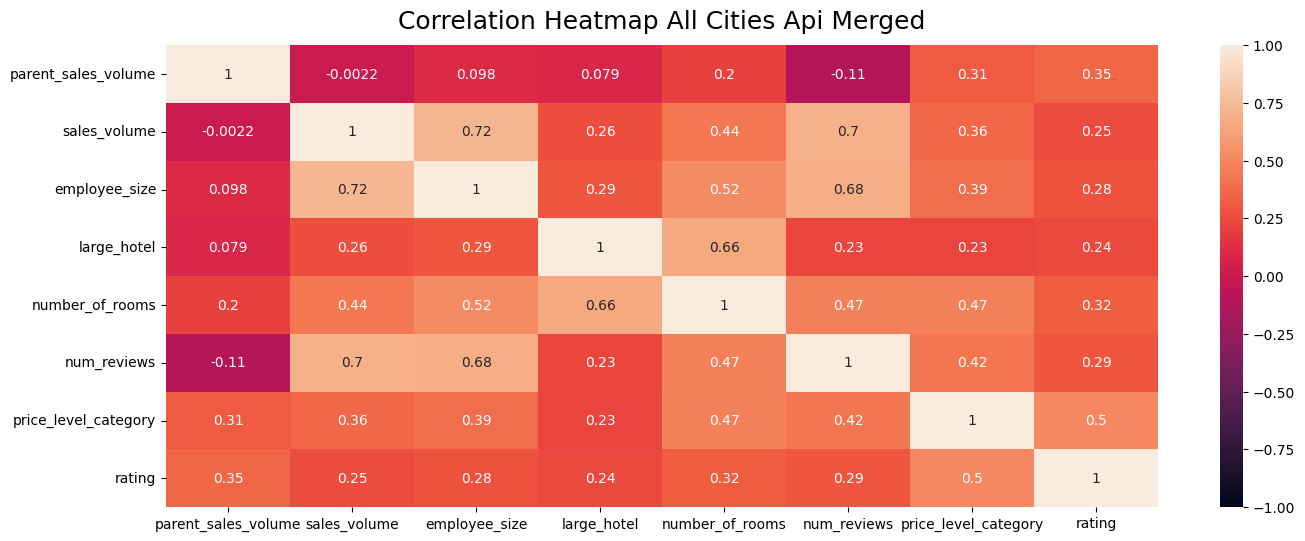

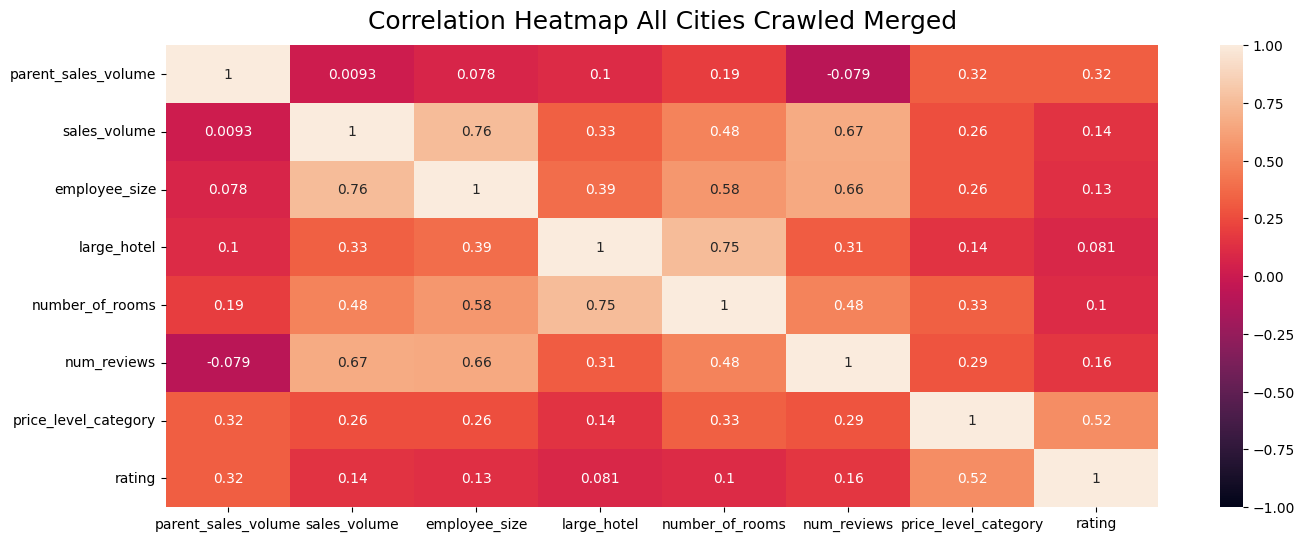

In [17]:
tcd.get_heatmaps("All Cities", all_cities_df_dict)

The correlation heatmaps for all cities combined show that the number of reviews is highly correlated with the business data columns sales volume and number of employees.

In [18]:
cities_dict = {
    "hilo": hilo_df_dict,
    "ann_arbor": ann_arbor_df_dict,
    "galveston": galveston_df_dict,
    "jersey_city": jersey_city_df_dict,
    "sunnyvale": sunnyvale_df_dict,
}
city_lst = ["Hilo", "Ann Arbor", "Galveston", "Jersey City", "Sunnyvale"]
api_table_column_names_lst = [
    "City",
    "Number of API Hotels",
    "Number of Large API Hotels",
    "Number of Small API Hotels",
    "Number of Null API Hotels",
    "Percentage of Large API Hotels",
    "Percentage of Null API Hotels",
]
crawled_table_column_names_lst = [
    "City",
    "Number of Crawled Hotels",
    "Number of Large Crawled Hotels",
    "Number of Small Crawled Hotels",
    "Number of Null Crawled Hotels",
    "Percentage of Large Crawled Hotels",
    "Percentage of Null Crawled Hotels",
]

In [19]:
api_table, crawl_table = tcd.create_and_display_hotel_tables(
    cities_dict, city_lst, api_table_column_names_lst, crawled_table_column_names_lst
)

The Tripadvisor crawl method collects significantly more hotels, over five times as many for locations like Hilo and Jersey City, but the number of large hotels remains similar. The crawl method also identifies many more small accommodations like guest houses, B&Bs, and cottages, and locations without room counts (null locations).

# Conclusion

For Perpetual's choice of bin placement by large hotels, the Tripadvisor API is a valuable potential addition to the prior pipelines.  This pathway grabs all the hotels, as they desire for bin placement and provides a consistent set of data for all cities and limits potential costs from additional calls and challenges from additional web crawling.


Additionally the number of reviews is a highly correlated variable with the business data columns sales volume and number of employees.  This could be a valuable metric for Perpetual to use in the future to determine the best locations for bin placement and could be used as an indicator inaddition to or instead of the number of rooms if the hotel data is not available.

While number of rooms is not as significant in the heatmaps as number of rooms, it is consistently comparable and statistically significant in the linear regressions.  This validates the use of number of rooms as a metric for bin placement.